In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
import pandas as pd
ne = pd.read_excel('National Election India 1977 - 2014.xlsx')

In [2]:
ne.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [3]:
len(ne)

73081

In [4]:
ne.describe()

,year,pc_no,totvotpoll,electors
count,73081.000000,73081.000000,73081.000000,7.308100e+04
mean,1996.779505,22.311490,49834.760266,1.122277e+06
std,10.432527,19.039793,104893.319706,3.560049e+05
min,1977.000000,1.000000,0.000000,1.947100e+04
25%,1989.000000,7.000000,872.000000,9.129850e+05
50%,1996.000000,18.000000,2743.000000,1.099503e+06
75%,2004.000000,33.000000,19185.000000,1.329086e+06
max,2014.000000,85.000000,863358.000000,3.368399e+06


In [5]:
print(ne["pc_type"].value_counts())

GEN    54862
SC      7293
ST      2841
SC        15
Name: pc_type, dtype: int64


In [6]:
print(ne["year"][ne["cand_sex"]=='F'].value_counts())

2014    668
1996    599
2009    556
2004    355
1991    330
1999    284
1998    274
1989    198
1984    171
1980    143
1977     70
Name: year, dtype: int64


In [7]:
print(ne["pc_type"].value_counts(normalize = True))


GEN    0.843888
SC     0.112181
ST     0.043700
SC     0.000231
Name: pc_type, dtype: float64


In [8]:
print(ne["pc_type"][ne["cand_sex"]=='F'].value_counts())

GEN    2448
SC      435
ST      206
SC        3
Name: pc_type, dtype: int64


In [9]:
print(ne["pc_type"][ne['cand_sex']=='M'].value_counts(normalize= True))
print(ne["pc_type"][ne['cand_sex']=='F'].value_counts(normalize= True))

GEN    0.847257
SC     0.110394
ST     0.042170
SC     0.000179
Name: pc_type, dtype: float64
GEN    0.791721
SC     0.140686
ST     0.066624
SC     0.000970
Name: pc_type, dtype: float64


In [10]:
print(ne.columns.values)

['st_name' 'year' 'pc_no' 'pc_name' 'pc_type' 'cand_name' 'cand_sex'
 'partyname' 'partyabbre' 'totvotpoll' 'electors']


In [11]:
print(ne['pc_type'].unique())

['GEN' nan 'ST' 'SC' 'SC ']


In [12]:
print(ne['cand_sex'].unique())

['M' 'F' nan 'O']


In [13]:
from sklearn import tree
ne.isnull().sum()

st_name          0
year             0
pc_no            0
pc_name          0
pc_type       8070
cand_name        0
cand_sex       542
partyname        0
partyabbre       0
totvotpoll       0
electors         0
dtype: int64

In [14]:
def nanreplacing(ind,outfilename):
    #Modifying the pd.DataFrame to get max value in each pc_name
    ad = pd.DataFrame(ind,columns=['pc_name','pc_type','year','totvotpoll']).apply(lambda y: y.str.strip() if y.dtype=="object" else y)
    ad = ad.dropna()
    ad = pd.DataFrame(ad.groupby(['pc_name','year']).max())
    ad = pd.DataFrame(ad.reset_index(level=['pc_name','year']))
    ad = pd.DataFrame(ad,columns=['pc_name','pc_type']).groupby('pc_name').agg(lambda  x : x.value_counts().index[0])
    #tes = ad.reset_index(level='pc_name').values.tolist()
    #print(tes)
    #temp1 = list()
    #temp2 = list()
    #for i in range(len(tes)):
     #   temp1.append(tes[i][0])
      #  temp2.append(tes[i][1])
    #lkp = dict(zip(temp1,temp2)) 
    lkp=ad.to_dict()['pc_type']
    #print(lkp)
    ind['pc_type'] = ind['pc_type'].fillna(ind['pc_name'].apply(lambda x : lkp.get(x) if lkp.get(x) != None else 'GEN' ))
    ind.to_excel(outfilename, sheet_name='Sheet1',index=False)
nanreplacing(ne,"C:\\Users\\satvi\\Desktop\\nani.xlsx")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\satvi\\Desktop\\nani.xlsx'

In [15]:
ne["cand_sex"] = ne["cand_sex"].fillna('M')

In [16]:
ne.isnull().sum()

st_name       0
year          0
pc_no         0
pc_name       0
pc_type       0
cand_name     0
cand_sex      0
partyname     0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64

In [17]:
#I took 'GEN' ( general) as Majorities.
# I took SC/st as Minorities so it will be simple.

In [18]:
ne=ne.replace(['GEN','SC ','ST','SC','INC(I)','chhattisgarh','Goa Daman & Diu','National Capital Territory Of Delhi','Nct Of Delhi','Orissa','pondicherry','uttaranchal'],['Majorities','Minorities','Minorities','Minorities','INC','Chattisgarh','Goa, Daman & Diu','Delhi','Delhi','Odisha','Puducherry','Uttarakhand'])

In [19]:
import matplotlib.pyplot as plt
ne_cross=pd.crosstab(ne['year'],[ne['cand_sex'],ne['pc_type']],margins=True)

In [20]:
ne_cross

cand_sex          F                     M                     O             \
pc_type  Majorities Minorities Majorities Minorities Majorities Minorities   
year                                                                         
1977             55         15       1971        398          0          0   
1980            114         29       3797        689          0          0   
1984            150         21       4509        812          0          0   
1989            169         29       5133        825          0          0   
1991            257         73       7240       1174          0          0   
1996            485        114      11627       1714          0          0   
1998            207         67       3720        746          0          0   
1999            220         64       3590        768          0          0   
2004            283         72       4194        886          0          0   
2009            444        112       6172       1342          0          0   
2014            508        160       6628       1492          5          1   
All            2892        756      58581      10846          5          1   

cand_sex    All  
pc_type          
year             
1977       2439  
1980       4629  
1984       5492  
1989       6156  
1991       8744  
1996      13940  
1998       4740  
1999       4642  
2004       5435  
2009       8070  
2014       8794  
All       73081

In [21]:
ne_cross = ne_cross.drop(labels='All', axis=1)
ne_cross= ne_cross.drop(labels='All', axis=0)
#ne_cross.drop(['M', 'O'], axis=1)

In [22]:
ne_cross

cand_sex          F                     M                     O           
pc_type  Majorities Minorities Majorities Minorities Majorities Minorities
year                                                                      
1977             55         15       1971        398          0          0
1980            114         29       3797        689          0          0
1984            150         21       4509        812          0          0
1989            169         29       5133        825          0          0
1991            257         73       7240       1174          0          0
1996            485        114      11627       1714          0          0
1998            207         67       3720        746          0          0
1999            220         64       3590        768          0          0
2004            283         72       4194        886          0          0
2009            444        112       6172       1342          0          0
2014            508        160       6628       1492          5          1

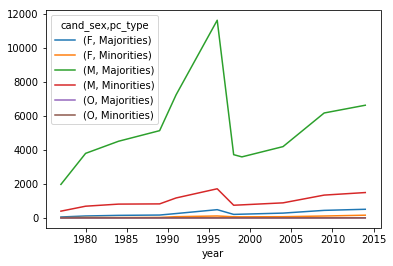

In [23]:
ax1=ne_cross.plot(kind='line')

In [24]:
#finding win and lost

In [25]:
ne_win = ne.groupby(['year','pc_name','pc_type'])['totvotpoll'].idxmax()

In [26]:
list_won=list(ne_win)

In [27]:
ne['result']='lost'

In [28]:
ne.ix[list_won,"result"]='won'

In [29]:
# I will be overwriting dataframe so i took ('fem' ='ne').

In [30]:
fem=ne

In [31]:
fem1=pd.crosstab(fem['year'],[fem['cand_sex'],fem['pc_type'],fem['result']],margins=True)

In [32]:
fem1

cand_sex          F                               M                         \
pc_type  Majorities      Minorities      Majorities       Minorities         
result         lost  won       lost  won       lost   won       lost   won   
year                                                                         
1977             38   17         13    2       1565   406        284   114   
1980             92   22         23    6       3411   386        577   112   
1984            113   37         15    6       4127   382        698   114   
1989            146   23         23    6       4747   386        714   111   
1991            227   30         64    9       6859   381       1063   111   
1996            459   26        100   14      11233   394       1608   106   
1998            178   29         53   14       3329   391        640   106   
1999            184   36         52   12       3206   384        660   108   
2004            250   33         60   12       3807   387        778   108   
2009            398   46        100   12       5795   377       1237   105   
2014            464   44        142   18       6263   365       1379   113   
All            2549  343        645  111      54342  4239       9638  1208   

cand_sex          O               All  
pc_type  Majorities Minorities         
result         lost       lost         
year                                   
1977              0          0   2439  
1980              0          0   4629  
1984              0          0   5492  
1989              0          0   6156  
1991              0          0   8744  
1996              0          0  13940  
1998              0          0   4740  
1999              0          0   4642  
2004              0          0   5435  
2009              0          0   8070  
2014              5          1   8794  
All               5          1  73081

In [33]:
# finding female minorities who won

In [34]:
fem=fem[fem.cand_sex == 'F']
fem=fem[fem.pc_type != 'Majorities']
fem=fem[fem.result !='lost']

In [35]:
fem1=pd.crosstab(fem['year'],[fem['cand_sex'],fem['pc_type'],fem['result']],margins=True)

In [36]:
fem1= fem1.drop(labels='All', axis=1)
fem1= fem1.drop(labels='All', axis=0)
fem1

cand_sex,F
pc_type,Minorities
result,won
year,
1977,2
1980,6
1984,6
1989,6
1991,9
1996,14
1998,14


Text(0.5, 1.0, 'Female Minorities Won In Indian Nation Elections')

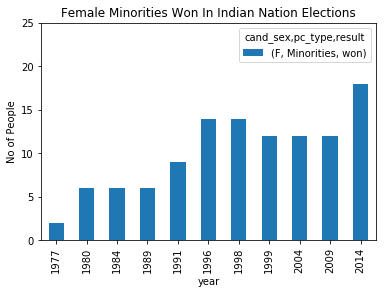

In [37]:
ax=fem1.plot(kind='bar')
plt.ylim(0,25)
plt.ylabel('No of People')
plt.title('Female Minorities Won In Indian Nation Elections')

In [38]:
fem2=pd.crosstab(fem['year'],[fem['cand_sex'],fem['partyabbre'],fem['result'],fem['pc_type']],margins=True)

In [39]:
#finding which party have more women winning number(minorities)
fem2

cand_sex            F                                                         \
partyabbre       ADMK       AITC       ASDC        BJD        BJP        BSP   
result            won        won        won        won        won        won   
pc_type    Minorities Minorities Minorities Minorities Minorities Minorities   
year                                                                           
1977                0          0          0          0          0          0   
1980                0          0          0          0          0          0   
1984                0          0          0          0          0          0   
1989                0          0          0          0          0          1   
1991                0          0          0          0          0          0   
1996                0          0          1          0          2          0   
1998                1          0          0          0          1          1   
1999                1          0          0          0          2          1   
2004                0          0          0          0          1          1   
2009                0          1          0          0          2          0   
2014                2          4          0          2          9          0   
All                 4          5          1          2         17          4   

cand_sex                                                                      \
partyabbre        CPI        CPM        INC         JD        RJD        RLD   
result            won        won        won        won        won        won   
pc_type    Minorities Minorities Minorities Minorities Minorities Minorities   
year                                                                           
1977                0          1          1          0          0          0   
1980                0          1          5          0          0          0   
1984                0          1          5          0          0          0   
1989                0          1          3          0          0          0   
1991                0          0          9          0          0          0   
1996                0          1          7          2          0          0   
1998                1          1          3          0          1          0   
1999                0          1          2          0          0          0   
2004                0          1          6          0          0          0   
2009                0          1          5          0          0          1   
2014                0          0          0          0          0          0   
All                 1          9         46          2          1          1   

cand_sex                                                                      \
partyabbre        SAD     SAD(M)        SHS         SP        TDP      YSRCP   
result            won        won        won        won        won        won   
pc_type    Minorities Minorities Minorities Minorities Minorities Minorities   
year                                                                           
1977                0          0          0          0          0          0   
1980                0          0          0          0          0          0   
1984                0          0          0          0          0          0   
1989                0          1          0          0          0          0   
1991                0          0          0          0          0          0   
1996                0          0          0          1          0          0   
1998                1          0          0          3          1          0   
1999                0          0          0          2          3          0   
2004                1          0          1          1          0          0   
2009                0          0          0          2          0          0   
2014                0          0          0          0          0          1  

In [40]:
# finding the female majorities who won

In [41]:
fem2=ne

In [42]:
fem2=fem2[fem2.cand_sex == 'F']
fem2=fem2[fem2.pc_type != 'Minorities']
fem2=fem2[fem2.result !='lost']

In [43]:
fem3=pd.crosstab(fem2['year'],[fem2['cand_sex'],fem2['pc_type'],fem2['result']],margins=True)

In [44]:
fem3= fem3.drop(labels='All', axis=1)
fem3= fem3.drop(labels='All', axis=0)

In [45]:
fem3

cand_sex,F
pc_type,Majorities
result,won
year,
1977,17
1980,22
1984,37
1989,23
1991,30
1996,26
1998,29


Text(0.5, 1.0, 'Female Majorities Won In Indian Nation Elections')

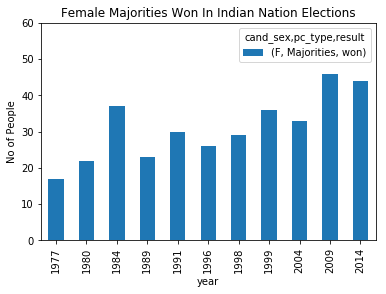

In [46]:
ax1=fem3.plot(kind='bar')
plt.ylim(0,60)
plt.ylabel('No of People')
plt.title('Female Majorities Won In Indian Nation Elections')

In [47]:
fem4=pd.crosstab(fem2['year'],[fem2['cand_sex'],fem2['partyabbre'],fem2['result'],fem2['pc_type']],margins=True)

In [48]:
# findind which party have more women won(majorities)
fem4

cand_sex            F                                                         \
partyabbre         AD        ADK       ADMK       AITC        BJD        BJP   
result            won        won        won        won        won        won   
pc_type    Majorities Majorities Majorities Majorities Majorities Majorities   
year                                                                           
1977                0          0          0          0          0          0   
1980                0          0          0          0          0          0   
1984                0          0          0          0          0          0   
1989                0          0          0          0          0          5   
1991                0          1          0          0          0         10   
1996                0          0          0          0          0         12   
1998                0          0          0          0          0         14   
1999                0          0          0          2          0         13   
2004                0          0          0          1          1          9   
2009                0          0          0          3          0         11   
2014                1          0          2          7          0         21   
All                 1          1          2         13          1         95   

cand_sex                                               ...              \
partyabbre        BLD        BSP        CPI        CPM ...      SAD(M)   
result            won        won        won        won ...         won   
pc_type    Majorities Majorities Majorities Majorities ...  Majorities   
year                                                   ...               
1977                8          0          1          1 ...           0   
1980                0          0          1          1 ...           0   
1984                0          0          1          0 ...           0   
1989                0          0          1          2 ...           1   
1991                0          0          1          2 ...           0   
1996                0          0          1          0 ...           0   
1998                0          0          1          2 ...           0   
1999                0          0          1          2 ...           0   
2004                0          0          0          4 ...           0   
2009                0          4          0          0 ...           0   
2014                0          0          0          1 ...           0   
All                 8          4          8         15 ...           1   

cand_sex                                                                      \
partyabbre        SHS         SP        SSP        TDP        TRS        UDF   
result            won        won        won        won        won        won   
pc_type    Majorities Majorities Majorities Majorities Majorities Majorities   
year                                                                           
1977                0          0          0          0          0          1   
1980                0          0          0          0          0          0   
1984                0          0          0          2          0          0   
1989                0          0          0          0          0          0   
1991                0          0          1          0          0          0   
1996                0          1          0          1          0          0   
1998                0          0          0          0          0          0   
1999                1          1          0          0          0          0   
2004                1          2          0          0          0          0   
2009                1          1          0          0          1          0   
2014                1          1          0          0          1          0   
All                 4          6          1          3          2          1   

cand_sex           

In [49]:
fmp1=ne
fmp1=fmp1[fmp1.cand_sex == 'F']
fmp1=fmp1[fmp1.pc_type != 'Minorities']
#fmp1=fmp1[fmp1.result !='lost']

In [50]:
fmp2=pd.crosstab(fmp1['year'],[fmp1['cand_sex'],fmp1['pc_type']],margins=True)

In [51]:
fmp2= fmp2.drop(labels='All', axis=1)
fmp2= fmp2.drop(labels='All', axis=0)

In [52]:
fmp2

cand_sex,F
pc_type,Majorities
year,
1977,55
1980,114
1984,150
1989,169
1991,257
1996,485
1998,207
1999,220


Text(0.5, 1.0, 'Female Majorities Participates In Indian Nation Elections')

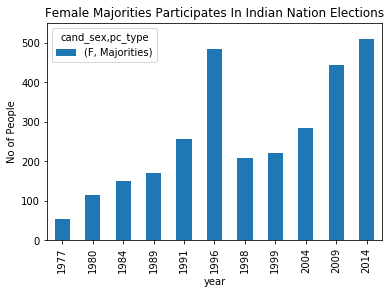

In [53]:
ax2=fmp2.plot(kind='bar')
plt.ylim(0,550)
plt.ylabel('No of People')
plt.title('Female Majorities Participates In Indian Nation Elections')

In [54]:
fmp3=ne
fmp3=fmp3[fmp3.cand_sex == 'F']
fmp3=fmp3[fmp3.pc_type != 'Majorities']

In [55]:
fmp4=pd.crosstab(fmp3['year'],[fmp3['cand_sex'],fmp3['pc_type']],margins=True)

In [56]:
fmp4= fmp4.drop(labels='All', axis=1)
fmp4= fmp4.drop(labels='All', axis=0)

In [57]:
fmp4

cand_sex,F
pc_type,Minorities
year,
1977,15
1980,29
1984,21
1989,29
1991,73
1996,114
1998,67
1999,64


Text(0.5, 1.0, 'Female Minorities Participates In Indian Nation Elections')

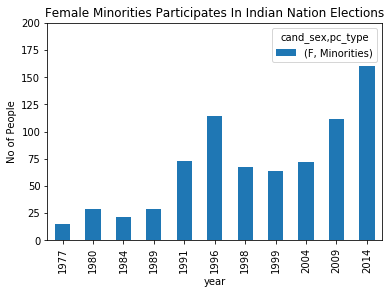

In [58]:
ax3=fmp4.plot(kind='bar')
plt.ylim(0,200)
plt.ylabel('No of People')
plt.title('Female Minorities Participates In Indian Nation Elections')

In [59]:
my_model = pd.crosstab(ne['year'], [ne['result'], ne['cand_sex'], ne['pc_type']], margins = True)
print(my_model)

result         lost                                                         \
cand_sex          F                     M                     O              
pc_type  Majorities Minorities Majorities Minorities Majorities Minorities   
year                                                                         
1977             38         13       1565        284          0          0   
1980             92         23       3411        577          0          0   
1984            113         15       4127        698          0          0   
1989            146         23       4747        714          0          0   
1991            227         64       6859       1063          0          0   
1996            459        100      11233       1608          0          0   
1998            178         53       3329        640          0          0   
1999            184         52       3206        660          0          0   
2004            250         60       3807        778          0 

In [60]:
# Losing Candidates
female_majorities_lost = my_model.lost.F.Majorities
female_minorities_lost = my_model.lost.F.Minorities
male_majorities_lost = my_model.lost.M.Majorities
male_minorities_lost = my_model.lost.M.Minorities

# Summing losses by gender
female_lost = female_majorities_lost + female_minorities_lost
male_lost = male_majorities_lost + male_minorities_lost
total_lost = female_lost + male_lost

# Winning Candidates
female_majorities_won = my_model.won.F.Majorities
female_minorities_won = my_model.won.F.Minorities
male_majorities_won = my_model.won.M.Majorities
male_minorities_won = my_model.won.M.Minorities

# Summing wins by gender
female_won = female_majorities_won + female_minorities_won
male_won = male_majorities_won + male_minorities_won

# Total number of Seats in Lok Sabha
minority_seats = female_minorities_won + male_minorities_won
majority_seats = female_majorities_won + male_majorities_won
total_seats_lok_sabha = majority_seats + minority_seats

# Total participants
total_participants = total_seats_lok_sabha + total_lost
# Winning & Losing Proportions
winnings_proportion = total_seats_lok_sabha/total_participants
losing_proportion = 1 - winnings_proportion

# Proportions: Won AND Minority Seats
minority_winning_proportions = minority_seats/total_seats_lok_sabha

## Majority Branch
# Proportions: Won AND Majority Seats 
majority_winning_proportions = 1 - minority_winning_proportions

# Proportions: Won AND Female AND Majority
won_female_and_majority = female_majorities_won/majority_seats

# Proportions: Won AND Male AND Majority
won_male_and_majority = 1 - won_female_and_majority

## Minority Branch
# Proportions: Won AND Female AND Minority
won_female_and_minority = female_minorities_won/minority_seats

# Proportions: Won AND Male AND Minority
won_male_and_minority = 1 - won_female_and_minority

In [61]:
# Testing the Axioms of Probability Theory that sum must equal to 1

test1 = minority_seats/(minority_seats + majority_seats)*(won_male_and_minority + won_female_and_minority) + majority_seats/(minority_seats + majority_seats) * (won_female_and_majority + won_male_and_majority)
#print(test2)
#test2= test1.drop(labels='All', axis=0)


In [62]:
## Calculating the Probability of a woman winning
# Computing the probability using Total Probability Law, explained more in the Research Paper

# Probability that a women wins equals Prob(woman won AND belongs to majority) plus Prob(woman won AND belongs to minority)

# Probability that a women won AND belongs to majority:
pr_won_female_maj = winnings_proportion * majority_winning_proportions * won_female_and_majority

# Probability that a women won AND belongs to minority:
pr_won_female_min = winnings_proportion * minority_winning_proportions * won_female_and_minority

# Probability that a women wins:
pr_won_female = pr_won_female_min + pr_won_female_maj

ar=pr_won_female*100
print(ar)
ar2= ar.drop(labels='All', axis=0)

year
1977    0.779008
1980    0.604882
1984    0.782957
1989    0.471085
1991    0.446020
1996    0.286944
1998    0.907173
1999    1.034037
2004    0.827967
2009    0.718711
2014    0.705508
All     0.621280
dtype: float64


Text(0.5, 1.0, 'Representation of women')

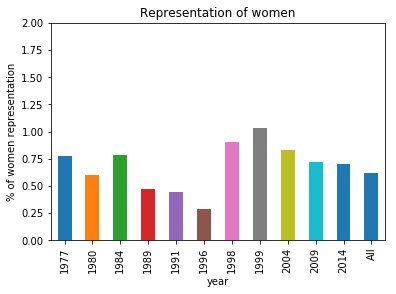

In [63]:
ax4=ar.plot(kind='bar')
plt.ylim(0,2)
plt.ylabel('% of women representation')
plt.title('Representation of women')

In [64]:
## Application of Bayes Theorem
# Question: A woman has won, what are the proportions that she belongs to minority?
# We condition upon the fact that a woman has won a seat, and compute it using the Bayes Theorem.
# This answer should give us an idea of how it is for a woman who belongs to minority to win

# Randomly picked women belongs to minority
pr_female_min_conditioned_upon_female_won = pr_won_female_min/pr_won_female

# Randomly picked woman belongs to majority
pr_female_maj_conditioned_upon_female_won = pr_won_female_maj/pr_won_female

# Percentage of picked woman belongs to minority
percentage_result1 = pr_female_min_conditioned_upon_female_won * 100

# Percentage of picked woman belongs to majority
percentage_result2 = pr_female_maj_conditioned_upon_female_won * 100
percentage_result3= percentage_result1.drop(labels='All', axis=0)
print(percentage_result3)

year
1977    10.526316
1980    21.428571
1984    13.953488
1989    20.689655
1991    23.076923
1996    35.000000
1998    32.558140
1999    25.000000
2004    26.666667
2009    20.689655
2014    29.032258
dtype: float64


Text(0.5, 1.0, 'Female Minorities In Indian Nation Elections')

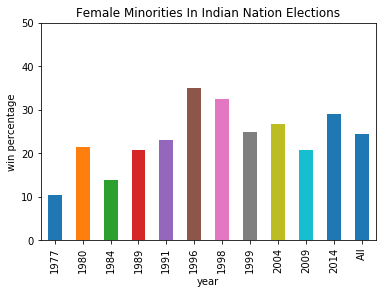

In [65]:
ax5=percentage_result1.plot(kind='bar')
plt.ylim(0,50)
plt.ylabel('win percentage')
plt.title('Female Minorities In Indian Nation Elections')

In [66]:
percentage_result4= percentage_result2.drop(labels='All', axis=0)
print(percentage_result4)

year
1977    89.473684
1980    78.571429
1984    86.046512
1989    79.310345
1991    76.923077
1996    65.000000
1998    67.441860
1999    75.000000
2004    73.333333
2009    79.310345
2014    70.967742
dtype: float64


Text(0.5, 1.0, 'Female Majorities In Indian Nation Elections')

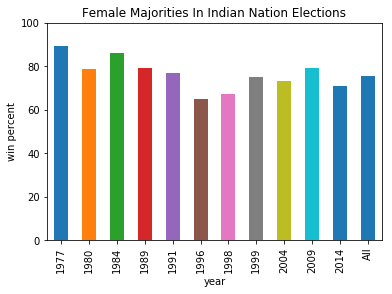

In [67]:
ax6= percentage_result2.plot(kind='bar')
plt.ylim(0,100)
plt.ylabel('win percent')
plt.title('Female Majorities In Indian Nation Elections')

In [68]:
## Lost Branch to compute the participants
# Total participants
total_participants = total_seats_lok_sabha + total_lost

# Losing Proportions
losing_proportion = 1 - winnings_proportion

# Majority & Minority that lost
majority_lost = female_majorities_lost + male_majorities_lost
minority_lost = male_minorities_lost + female_minorities_lost

# Belonged to majority GIVEN that they lost:
pr_maj_given_lost = majority_lost/total_lost

# Belonged to minority GIVEN that they lost:
pr_min_given_lost = minority_lost/total_lost


# Male Given that they belonged to majority & lost:
pr_male_maj_given_lost = male_majorities_lost/majority_lost

# Female given that they belonged to minority & lost:
pr_female_maj_given_lost = female_majorities_lost/majority_lost

## Minority leaf
# Belonged to Male Minority given that they lost:
pr_male_min_given_lost = male_minorities_lost/minority_lost

# Belonged to Female Minorties given that they lost:
pr_female_min_given_lost = female_minorities_lost/minority_lost


## Testing the Axioms of Probability to Make sure that the tree equals ONE
# Test 2 for losing branch
test2 = pr_maj_given_lost*(pr_male_maj_given_lost + pr_female_maj_given_lost) + pr_min_given_lost*(pr_male_min_given_lost + pr_female_min_given_lost)
print(test2)


## Combining Lok Sabha Leaf and Losing Participant's Leaf
test3 = winnings_proportion*test1 + losing_proportion*test2
print(test3)

year
1977    1.0
1980    1.0
1984    1.0
1989    1.0
1991    1.0
1996    1.0
1998    1.0
1999    1.0
2004    1.0
2009    1.0
2014    1.0
All     1.0
dtype: float64
year
1977    1.0
1980    1.0
1984    1.0
1989    1.0
1991    1.0
1996    1.0
1998    1.0
1999    1.0
2004    1.0
2009    1.0
2014    1.0
All     1.0
dtype: float64


year
1977    0.484262
1980    0.835655
1984    0.720288
1989    0.702576
1991    0.721732
1996    0.765864
1998    1.722017
1999    1.442308
2004    1.252610
2009    0.825309
2014    1.089588
dtype: float64


Text(0.5, 1.0, ' Conversion rate for women in minority')

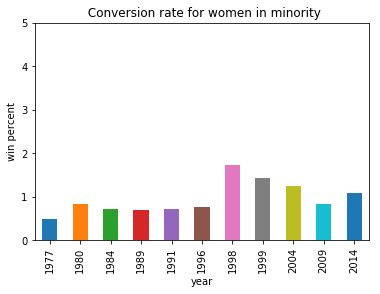

In [69]:
## Conversion Rates for Minority

# Probability that a female won that year
pr_won_female

# Pool that a minority female contests the elections against:
total_minority_participants = winnings_proportion * minority_winning_proportions * (won_male_and_minority + won_female_and_minority) + losing_proportion * pr_min_given_lost * (pr_male_min_given_lost + pr_female_min_given_lost)

# Conversion rate for women in minority:
conversion_rate_female_min = winnings_proportion * minority_winning_proportions * won_female_and_minority / total_minority_participants
crf=conversion_rate_female_min * 100
crf1= crf.drop(labels='All', axis=0)
print(crf1)

ax6= crf1.plot(kind='bar')
plt.ylim(0,5)
plt.ylabel('win percent')
plt.title(' Conversion rate for women in minority')

year
1977    0.839092
1980    0.562516
1984    0.794162
1989    0.433799
1991    0.400160
1996    0.214663
1998    0.738477
1999    0.944882
2004    0.737101
2009    0.695284
2014    0.616592
dtype: float64


Text(0.5, 1.0, ' Conversion rate for women in majorities')

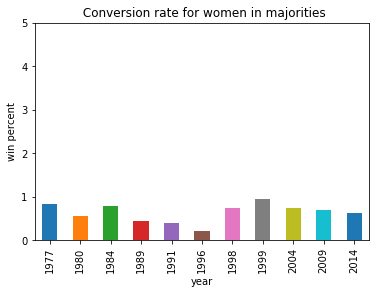

In [70]:
## Conversion Rates for Female in Majority
total_majority_participants = winnings_proportion * majority_winning_proportions * (won_male_and_majority + won_female_and_majority) + losing_proportion * pr_maj_given_lost * (pr_male_maj_given_lost + pr_female_maj_given_lost)

conversion_rate_female_maj = winnings_proportion * majority_winning_proportions * won_female_and_majority / total_majority_participants
crfm=conversion_rate_female_maj * 100
crfm1= crfm.drop(labels='All', axis=0)
print(crfm1)
ax7= crfm1.plot(kind='bar')
plt.ylim(0,5)
plt.ylabel('win percent')
plt.title(' Conversion rate for women in majorities')

year
1977     3.525046
1980     5.323194
1984     7.977737
1989     5.513308
1991     7.344633
1996     7.407407
1998     7.962963
1999     8.888889
2004     8.333333
2009    10.740741
2014    11.481481
dtype: float64


Text(0.5, 1.0, 'percentage_female_representation')

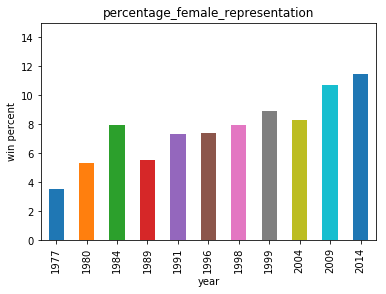

In [71]:
# Probability that a women won AND belongs to majority:
won_female_maj = majority_winning_proportions * won_female_and_majority

# Probability that a women won AND belongs to minority:
won_female_min = minority_winning_proportions * won_female_and_minority

female_representation = won_female_maj + won_female_min

percentage_female_representation = female_representation * 100

pfr=percentage_female_representation
pfr1= pfr.drop(labels='All', axis=0)
print(pfr1)
ax8= pfr1.plot(kind='bar')
plt.ylim(0,15)
plt.ylabel('win percent')
plt.title('percentage_female_representation')


In [72]:
## Statistics TIME

# Let x be the winning chance of female in minority
x = conversion_rate_female_min
x_bar = x.mean()
variance_x = x.var()

print('x_bar: ', x_bar)
print('variance of x: ', variance_x)


# Let y be the winning chance of female in majority
y = conversion_rate_female_maj
y_bar = y.mean()
variance_y = y.var()

print('y_bar: ', y_bar)
print('variance of y: ', variance_y)

x_bar:  0.009599117331128351
variance of x:  1.2671223365793133e-05
y_bar:  0.006278913218173587
variance of y:  4.281946691893752e-06


In [73]:
## Hypothesis testing

# Null Hypothesis: On average, there is no difference between the conversion rates of female in minority and female in majority
# Alternative Hypothesis: On average, the difference of the means is not zero

# Introducing a new random variable 'z' such that z = x - y
z_bar = x_bar - y_bar

# Variance of Z:
variance_z = variance_x + variance_y

# Importing libararies for statistics and mathematics
import scipy.stats as st
import math

# Standard deviation of z
std_z = math.sqrt(variance_z)


# We use a two-tailed test to look at the mean_difference
alpha = 0.025

# Finding the z-value at 95% level of significance
z_value = st.norm.ppf(1 - alpha)

# Computing the critical value:
critical_value = z_value * std_z

print('Critical Value is:', critical_value)
print('Difference of averages is: ', z_bar)

# Comparing the mean_difference to critcal_value
if z_bar >= critical_value:
    print ('Mean_difference is greater than critical value, which implies that there is statistical evidence to reject the null hypothesis')
elif z_bar <= critical_value:
    print('Mean_difference is less than the critical value. Not enough evidence to reject Null Hypothesis')







Critical Value is: 0.008070000288527182
Difference of averages is:  0.003320204112954764
Mean_difference is less than the critical value. Not enough evidence to reject Null Hypothesis


In [74]:
print(z_bar)

0.003320204112954764


In [75]:
variance_z

1.6953170057686884e-05

In [79]:
import numpy as np
np.cov(x,y)
np.corrcoef(x,y)

array([[1.        , 0.38388027],
       [0.38388027, 1.        ]])

In [80]:
np.cov(x,y)

array([[1.26712234e-05, 2.82765029e-06],
       [2.82765029e-06, 4.28194669e-06]])